# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# read the data
df = pd.read_csv('C:/Users/Eldred OFUA/Desktop/Data Science and Business Analytics PG Program/4. Project 1/foodhub_order.csv')
# returns the first 5 rows
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Eldred OFUA/Desktop/Data Science and Business Analytics PG Program/4. Project 1/foodhub_order.csv'

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [9]:
# Write your code here
df.shape

NameError: name 'df' is not defined

#### Observations:
The Dataset has 1898 number of rows and 9 number of columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# Use info() to print a concise summary of the DataFrame
df.info()

NameError: name 'df' is not defined

#### Observations:

There are 4 object datatype columns and 5 numerical datatype columns.

Rating is read as object type column, but should be read as a numerical column.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here

df.isnull().sum()

NameError: name 'df' is not defined

#### Observations:

There are no missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [5]:
# Write your code here
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
df.describe().T

NameError: name 'df' is not defined

#### Observations:

The minimum time taken for food to be prepared is 20.00 minutes

The average time taken for food to be prepared is 27.37 minutes

The maximum time taken for foos to be prepared is 35.00 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

There are 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [10]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [11]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


##### Taking a look at the column of Cost_of_the_order, food_preparation_time, and delivery_time.

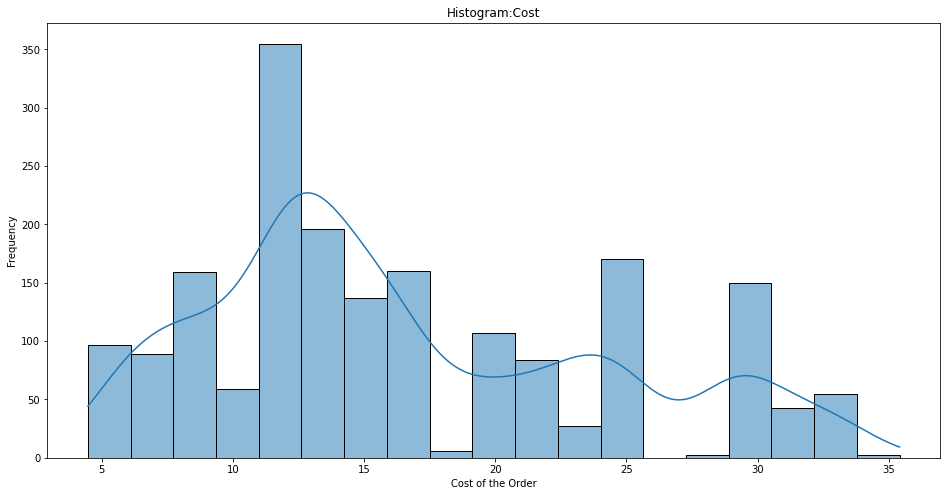

In [12]:
plt.figure(figsize=(16, 8))
plt.title('Histogram:Cost')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
sns.histplot(data=df, x='cost_of_the_order', kde=True);

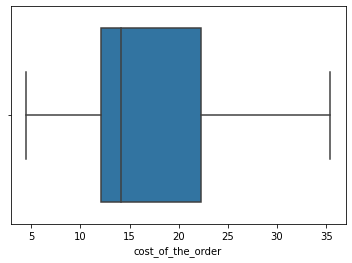

In [13]:
sns.boxplot(data=df, x='cost_of_the_order');

Observations:

        The data is spread out slightly like a normal distibution, with most order having a price of 11.7 USD.
        
        The distribution is slightly right skewed, with no outliers.
        
        the median cost of order is 14 USD.

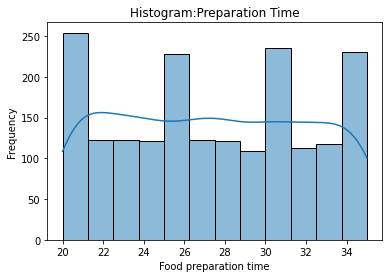

In [14]:

plt.title('Histogram:Preparation Time')
plt.xlabel('Food preparation time')
plt.ylabel('Frequency')
sns.histplot(data=df, x='food_preparation_time', kde=True);

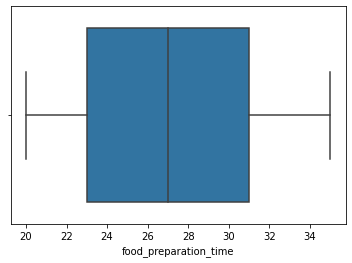

In [15]:
sns.boxplot(data=df, x='food_preparation_time');

Observation:

   Food preparation time gives a fairly uniform distribution across the restaurants, with exception of 4 relatively higher bins.
        
   75% of the various cuisines are prepared in 31 minutes.

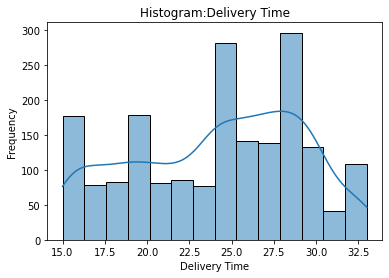

In [29]:
plt.title('Histogram:Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
sns.histplot(data=df, x='delivery_time', kde=True);

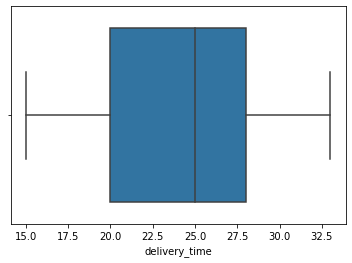

In [30]:
sns.boxplot(data=df, x='delivery_time');

Observations:

   Most of the cuisine ordered are delivered in 28.2 and 25 minutes respectively.
   
   The median delivery time is 25 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [34]:
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

The top 5 restaurant with highest number of orders received are:

    1. Shake Shack with 219 orders received
    2. The meatball Shop with 132 orders received.
    3. Blue Ribbon Sushi with 119 orders received.
    4. Blue Ribbon Fried Chicken with 96 orders received.
    5. Parm with 68 orders received.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [16]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [17]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [18]:
# Write the code here
Most_Popular_Cui= df.groupby('cuisine_type')[['day_of_the_week']].count().sort_values('day_of_the_week', ascending=False)
Most_Popular_Cui

,day_of_the_week
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


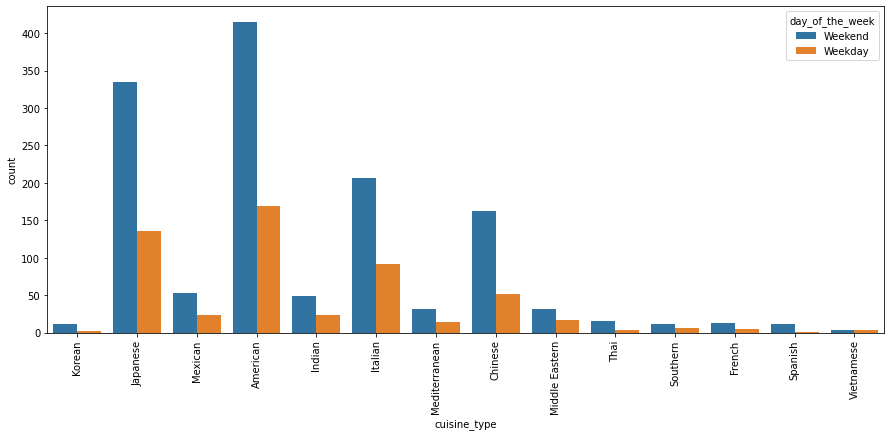

In [19]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week');

#### Observations:

    American cuisine is the most popular on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [20]:
# Write the code here
df.loc[df['cost_of_the_order']>20].shape[0]/df.shape[0]*100

29.24130663856691

#### Observations:

    29.24 percent of the total orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [21]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:

    The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [22]:
# Write the code here
most_freq_cust= df.groupby('customer_id')[['order_id']].count().sort_values('order_id', ascending=False).head(3)
most_freq_cust

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:

    Customer with id number 52832 is the highest with 13 orders
    
    Customer with id number 47440 is second with 10 orders.
    
    Customer with id number 83287 is third with 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


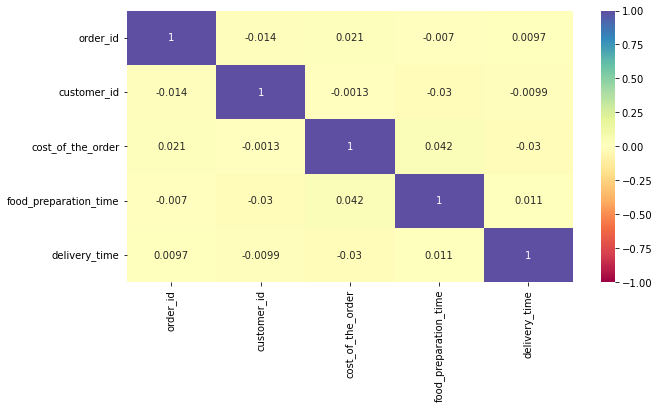

In [23]:
# Write the code here
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

### Observations

    1. Correlation values with order id and customer id should not be considered because these columns are unique identifiers for customers and for the cuisine ordered. There values do not affect or effect any other columns.
    
    2. Food preparation time shows a positive correlation with delivery time.

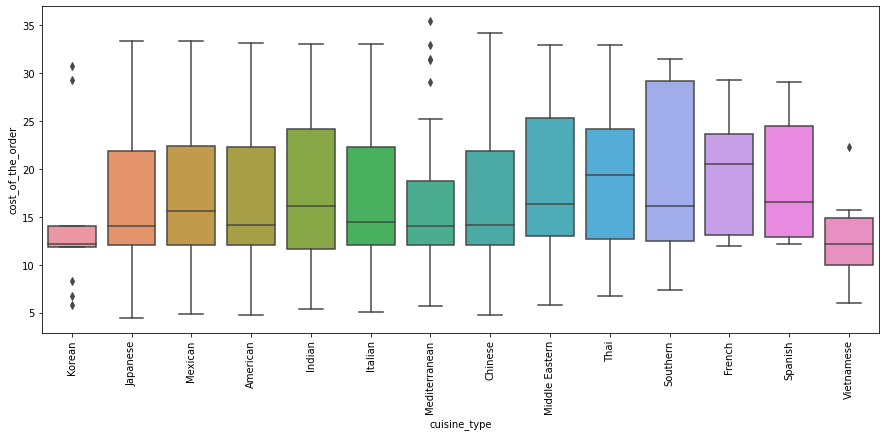

In [86]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order');

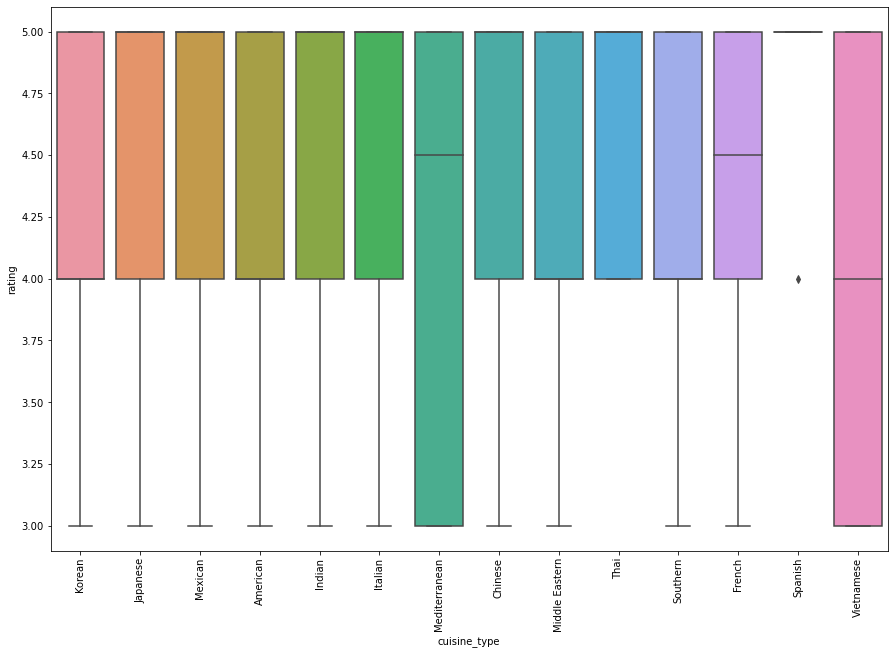

In [74]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(data=df, x='cuisine_type', y='rating');

Observations:

    1. The median price of all cuisine falls between the range of 13 dollars to 20 dollars.
    2. Mediterranean cuisine has a large outlier of 35 dollars, followed by Korean, then Vietnamese.
    3. 25% of most of the cuisine ordered falls below 13 dollars.
    4. All cuisine except Mediterranean, Vietnamese and Spanish have 25 percent of their rating between 3.0 to 4.0.

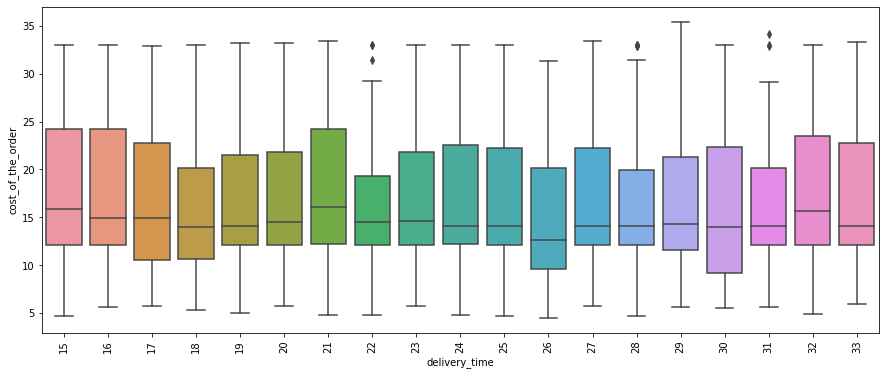

In [88]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.boxplot(data=df, x='delivery_time', y='cost_of_the_order');

Observation:

    1. Cost of order does not affect delivery time.

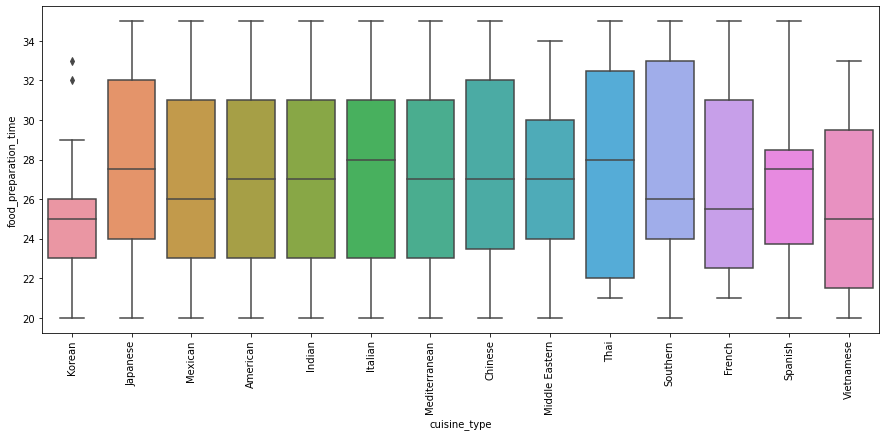

In [89]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time');

Observations:

    1. 75% of Korean cuisine is prepared in 26 minutes, which is the fastest amongst all cuisines.

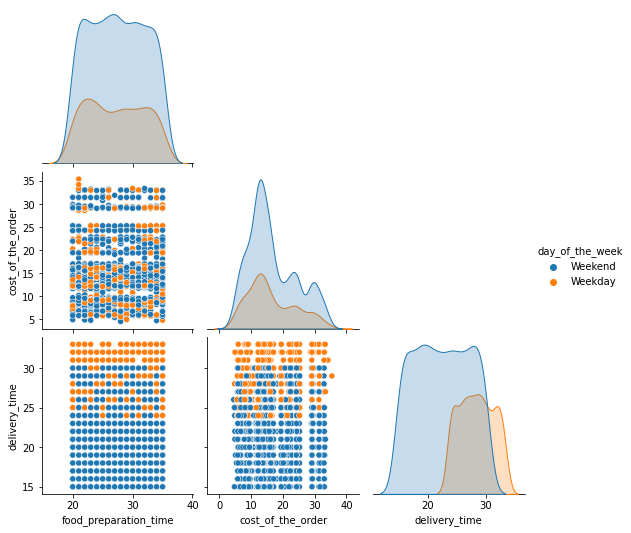

In [26]:
sns.pairplot(data=df, vars=['food_preparation_time', 'cost_of_the_order', 'delivery_time'], hue ='day_of_the_week', corner=True);

Observations:

    1. There are more orders on weekends compared to weekdays.
    2. There is no observable correlation between these numerical values.

In [27]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [29]:
df['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

In [30]:
# replacing values with nan
df['rating'] = df['rating'].replace(['Not given'],np.nan)

# changing the data type to float
df['rating'] = df['rating'].astype(float)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


### Observation:

    The rating is now a float data type.

In [137]:
df['restaurant_name'].unique()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.0,23,31


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [32]:
# Write the code here
promotional_offer= df.groupby('restaurant_name')[['rating']].value_counts().sort_values(ascending=False)
promotional_offer

restaurant_name            rating
Shake Shack                5.0       60
The Meatball Shop          5.0       53
Shake Shack                4.0       50
Blue Ribbon Sushi          5.0       32
Blue Ribbon Fried Chicken  5.0       32
                                     ..
Kambi Ramen House          5.0        1
Klong                      5.0        1
Kori Restaurant and Bar    4.0        1
L'Express                  3.0        1
indikitch                  5.0        1
Length: 281, dtype: int64

#### Observations:

    1. Shakeshack and The Meatball shop met the critria to get the promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [76]:
y = df['cost_of_the_order']

x1 = 0
x2 = 0
i = 0

for i in y:
    if i > 20:
        x1 += i
    elif i > 5 and i < 20:
        x2 += i
    else:
        net_revenue = 0
        
net_revenue = 0.25 * x1 + 0.15 * x2
print('Net revenue generated is $',net_revenue)

Net revenue generated is $ 6166.302999999998


#### Observations:

    The net revenue generated by the company across all orders is 6,166.30 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [41]:
total_time = df['food_preparation_time'] + df['delivery_time']
df1 = pd.DataFrame(total_time,columns=['total_time'])
df1.loc[df1['total_time']>60].shape[0]/df1.shape[0]*100

10.537407797681771

#### Observations:

    10.53 percent of orders takes more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [66]:
dt_weekend = df[df['day_of_the_week'] == 'Weekend']
d1 = dt_weekend['delivery_time'].mean()
print(d1)

22.4700222057735


In [67]:
dt_weekday = df[df['day_of_the_week'] == 'Weekday']
d2 = dt_weekday['delivery_time'].mean()
print(d2)

28.340036563071298


In [69]:
# difference in mean delivery times
dmt = d2-d1
print(dmt)

5.870014357297798


In [75]:
print('There is a ',dmt,'minutes difference in the mean delivery times between delivery done during the week days and the weekends')

There is a  5.870014357297798 minutes difference in the mean delivery times between delivery done during the week days and the weekends


#### Observations:

Delivery times are on the average 5.8 minutes faster on the weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

*  Highest sales across all cuisines and restaurants are made on the weekends.

*  American cuisine is the most ordered cuisine followed by Japanese, Italian and Chinese

*  Shake Shack and The Meatball Shop have the highest number of ratings above 4, hence their food and services is good.

*  Theere is no correlation between Price of Cuisine and Delivery Time.

### Recommendations:

*  Foodhub should employ more adhoc delivery staff on the weekends, since more orders are made then.

*  Foodhub should engage restaurants that have relatively low ratings for Mediterranean and Vietnamese cuisine, to see how the ratings from those restaurants.

---